In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import re
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df1 = pd.read_csv('duration eda_bowen.csv')

In [4]:
df1.columns

Index(['Unnamed: 0', 'rank', 'nct number', 'title', 'acronym', 'status',
       'study results', 'conditions', 'interventions', 'outcome measures',
       'sponsor/collaborators', 'gender', 'age', 'phases', 'enrollment',
       'funded bys', 'study type', 'study designs', 'other ids', 'start date',
       'primary completion date', 'completion date', 'first posted',
       'results first posted', 'last update posted', 'locations',
       'study documents', 'url', 'duration', 'ftype2', 'cond1', 'allocation',
       'interv_mod2', 'mask1', 'purp1'],
      dtype='object')

In [5]:
df1['outcome measures'].str.lower()

0       maximum tolerated dose|toxicity profile of et1...
1       mtd of everolimus in combination with r-chop|a...
2       safety and tolerability of parsaclisib in comb...
3       percentage of participants who experienced a d...
4       incidence rate of dose-limiting toxicities (dl...
                              ...                        
1084    maximum tolerated dose (mtd)|number of partici...
1085    assess safety and feasibility of monoclonal ab...
1086                                                  NaN
1087                                                  NaN
1088    phase i: maximum tolerated dose|phase ii: anti...
Name: outcome measures, Length: 1089, dtype: object

In [6]:
df1 = df1.rename(columns = {'nct number':'nct_number'})

In [7]:
df2 = pd.read_csv('updated_data (2).csv')

In [8]:
df2.columns

Index(['rank', 'nct_number', 'title', 'acronym', 'status', 'study_results',
       'conditions', 'interventions', 'outcome_measures',
       'sponsor/collaborators', 'gender', 'age', 'phases', 'enrollment',
       'funded_bys', 'study_type', 'study_designs', 'other_ids',
       'results_first_posted', 'locations', 'study_documents', 'url',
       'duration', 'measure_PFS', 'measure_MTD', 'measure_Cmax', 'measure_OS',
       'measure_DOR', 'measure_DLT', 'measure_', 'measure_AEs', 'measure_Tmax',
       'measure_ORR', 'number_of_measures', 'drug_included',
       'biological_included', 'other_included', 'procedure_included',
       'intervention_count', 'multiple_interverions',
       'include_country_United States', 'include_country_France',
       'include_country_United Kingdom', 'include_country_Germany',
       'lead_country', 'location_count', 'multiple_locations', 'pfizer',
       'NCI_as_sponsor', 'Pfizer_as_sponsor',
       'National Cancer Institute (NCI)',
       'National In

In [10]:
df = df1.merge(df2[['nct_number','measure_PFS', 'measure_MTD', 'measure_Cmax', 'measure_OS',
       'measure_DOR', 'measure_DLT', 'measure_', 'measure_AEs', 'measure_Tmax',
       'measure_ORR', 'number_of_measures', 'drug_included',
       'biological_included', 'other_included', 'procedure_included',
       'intervention_count', 'multiple_interverions',
       'include_country_United States', 'include_country_France',
       'include_country_United Kingdom', 'include_country_Germany',
       'lead_country', 'location_count', 'multiple_locations']], how = 'left')

In [11]:
df.columns = df.columns.str.lower()

## add variables from Fangya

In [39]:
## 1. sponsor/collaborator

In [12]:
spon = " ".join(df["sponsor/collaborators"].str.split('|').explode("sponsor/collaborators")).lower().split(" ")

In [13]:
pd.DataFrame.from_dict(Counter(spon), orient='index').reset_index().sort_values(by=0, ascending = False)[:20]

,index,0
12,cancer,475
11,national,338
13,institute,312
14,(nci),254
36,center,250
4,university,232
58,of,231
2,inc.,184
59,health,78
7,clinical,78


In [14]:
values=["university", "academic", "research" ,"hospital", "nci", "institute"]
# Industry vs Academic
df['np_spon'] = np.where(df["sponsor/collaborators"].str.lower().str.contains('|'.join(values)),1 ,0)

In [15]:
df["sponsor/collaborators"]

0              Eureka Therapeutics Inc.|Peking University
1       Alliance for Clinical Trials in Oncology|Natio...
2                                      Incyte Corporation
3                      Beijing Mabworks Biotech Co., Ltd.
4       The Lymphoma Academic Research Organisation|Ka...
                              ...                        
1084                          M.D. Anderson Cancer Center
1085    Baylor College of Medicine|The Methodist Hospi...
1086    Northwestern University|National Cancer Instit...
1087    Northwestern University|National Cancer Instit...
1088                         Philogen S.p.A.|Eudax S.r.l.
Name: sponsor/collaborators, Length: 1089, dtype: object

In [16]:
df.groupby('np_spon')['duration'].agg(['count', 'mean'])

,count,mean
np_spon,,
0,567,1515.696649
1,522,2084.536398


In [42]:
## 2. age - contains child

In [17]:
age = " ".join(df["age"].str.split('|').explode("age")).lower().split(" ")

In [18]:
pd.DataFrame.from_dict(Counter(age), orient='index').reset_index().sort_values(by=0, ascending = False)[:20]

,index,0
3,older,1680
1,years,1289
4,,1049
6,adult),1013
5,"(adult,",844
0,18,827
2,and,713
7,to,336
15,"(child,",166
16,"adult,",123


In [19]:
df['adult_include']=np.where(df["age"].str.lower().str.contains("adult"),1 ,0)
df['child_include']=np.where(df["age"].str.lower().str.contains("child"),1 ,0)

In [ ]:
## title

In [20]:
title = " ".join(df["title"].str.split('|').explode("title")).lower().split(" ")

In [21]:
pd.DataFrame.from_dict(Counter(title), orient='index').reset_index().sort_values(by=0, ascending = False)[:50]

,index,0
5,in,929
18,with,867
2,of,699
13,and,583
17,patients,541
33,or,521
10,lymphoma,493
1,study,477
36,a,256
7,refractory,226


In [22]:
df['refra_ttl'] = np.where(df["title"].str.lower().str.contains("refractory"),1 ,0)
df['relap_ttl'] = np.where(df["title"].str.lower().str.contains("relapsed"),1 ,0)
df['adv_ttl'] = np.where(df["title"].str.lower().str.contains("advanced"),1 ,0)
df['nonhod_ttl'] = np.where(df["title"].str.lower().str.contains("non-hodgkin's"),1 ,0)

In [23]:
#pattern = re.compile(r"\b(chemo)\b", re.IGNORECASE)
df['chemo_ttl'] = np.where(df["title"].str.lower().str.contains('chemo'),1 ,0)

In [24]:
df.groupby('chemo_ttl')['duration'].agg(['count','mean'])

,count,mean
chemo_ttl,,
0,1017,1766.309735
1,72,2099.875000


In [69]:
#df[df['title'].str.lower().str.contains('chemo')]['title'].to_csv('chemo.csv')

In [ ]:
## intervention

In [25]:
interv = " ".join(df["interventions"].str.split('|').explode("interventions")).lower().split(" ")

In [26]:
pd.DataFrame.from_dict(Counter(interv), orient='index').reset_index().sort_values(by=0, ascending = False)[:20]

,index,0
6,drug:,1995
0,biological:,339
68,other:,151
136,procedure:,135
5,rituximab,122
138,cell,96
7,cyclophosphamide,83
139,transplantation,79
137,stem,77
368,analysis,71


In [27]:
df['ritu_int'] = np.where(df["interventions"].str.lower().str.contains("rituximab"),1 ,0)
df['cell_int'] = np.where(df["interventions"].str.lower().str.contains("cell"),1 ,0)
df['cyclo_int'] = np.where(df["interventions"].str.lower().str.contains("cyclophosphamide"),1 ,0)
df['stem_int'] = np.where(df["interventions"].str.lower().str.contains("stem"),1 ,0)
df['bio_int'] = np.where(df["interventions"].str.lower().str.contains("biomarker"),1 ,0)
df['flud_int'] = np.where(df["interventions"].str.lower().str.contains("fludarabine"),1 ,0)
df['hydro_int'] = np.where(df["interventions"].str.lower().str.contains("hydrochloride"),1 ,0)
df['radia_int'] = np.where(df["interventions"].str.lower().str.contains("radiation"),1 ,0)

In [77]:
## conditions

In [28]:
cond = " ".join(df["conditions"].str.split('|').explode("conditions")).lower().split(" ")

In [29]:
pd.DataFrame.from_dict(Counter(cond), orient='index').reset_index().sort_values(by=0, ascending = False)[:50]

,index,0
2,lymphoma,1655
80,leukemia,702
14,recurrent,455
5,cell,425
16,adult,393
87,acute,370
39,cancer,311
229,stage,282
60,lymphocytic,254
82,chronic,253


In [30]:
df['leuke_con'] = np.where(df["conditions"].str.lower().str.contains("leukemia"),1 ,0)
df['recur_con'] = np.where(df["conditions"].str.lower().str.contains("recurrent"),1 ,0)
df['acut_con'] = np.where(df["conditions"].str.lower().str.contains("acute"),1 ,0)
df['chro_con'] = np.where(df["conditions"].str.lower().str.contains("chronic"),1 ,0)
df['nonho_con'] = np.where(df["conditions"].str.lower().str.contains("non-hodgkin"),1 ,0)
df['refra_con'] = np.where(df["conditions"].str.lower().str.contains("refractory"),1 ,0)
df['myel_con'] = np.where(df["conditions"].str.lower().str.contains("myeloma"),1 ,0)
df['myelo_con'] = np.where(df["conditions"].str.lower().str.contains("myeloid"),1 ,0)

## 1. duration bin

<AxesSubplot:>

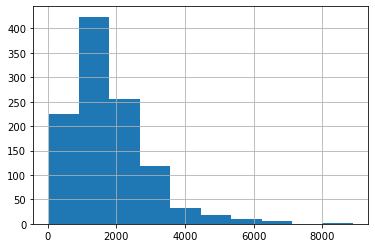

In [31]:
df.duration.hist()

In [32]:
df.duration.mean()

1788.3636363636363

In [33]:
def condition(x):
    if x<1825:
        return "D1: <5yr"
    else:
        return 'D2: 5yr+'

In [34]:
df['dc'] = df['duration'].apply(lambda x: condition(x))

In [35]:
df.dc.value_counts()

D1: <5yr    651
D2: 5yr+    438
Name: dc, dtype: int64

In [36]:
df.columns

Index(['unnamed: 0', 'rank', 'nct_number', 'title', 'acronym', 'status',
       'study results', 'conditions', 'interventions', 'outcome measures',
       'sponsor/collaborators', 'gender', 'age', 'phases', 'enrollment',
       'funded bys', 'study type', 'study designs', 'other ids', 'start date',
       'primary completion date', 'completion date', 'first posted',
       'results first posted', 'last update posted', 'locations',
       'study documents', 'url', 'duration', 'ftype2', 'cond1', 'allocation',
       'interv_mod2', 'mask1', 'purp1', 'measure_pfs', 'measure_mtd',
       'measure_cmax', 'measure_os', 'measure_dor', 'measure_dlt', 'measure_',
       'measure_aes', 'measure_tmax', 'measure_orr', 'number_of_measures',
       'drug_included', 'biological_included', 'other_included',
       'procedure_included', 'intervention_count', 'multiple_interverions',
       'include_country_united states', 'include_country_france',
       'include_country_united kingdom', 'include_countr

## 2. modeling

In [34]:
## 2.0 data prepare - one hot encoding

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
df.dc.value_counts()

D1: <5yr    651
D2: 5yr+    438
Name: dc, dtype: int64

In [39]:
df['y_class'] = 1
df.loc[df['dc'] =="D1: <5yr",'y_class'] = 0

In [40]:
df['indus'] = df['ftype2'].apply(lambda x: 1 if x=='Industry Lead' else 0)

In [41]:
df['condition_count'] = df.conditions.str.count('\|') + 1

In [42]:
df['random'] = df['allocation'].apply(lambda x: 1 if x=='Randomized' else 0)

In [43]:
df['cross'] = df['interv_mod2'].apply(lambda x: 1 if x=='Crossover Assignment' else 0)

In [44]:
df['label_open'] = df['mask1'].apply(lambda x: 1 if x=='None (Open Label)' else 0)
df['label_nopen'] = df['mask1'].apply(lambda x: 1 if x=='Not Open Label' else 0)

In [45]:
df.mask1.value_counts()

None (Open Label)    996
Not Open Label        14
Name: mask1, dtype: int64

In [46]:
df['purp_treat'] = df['purp1'].apply(lambda x: 1 if x=='Treatment/Diagnostic' else 0)
df['purp_prev'] = df['purp1'].apply(lambda x: 1 if x=='Other/Basic/Prevention' else 0)

In [47]:
df.purp1.value_counts()

Treatment/Diagnostic      1035
Other/Basic/Prevention      34
Supportive Care             15
Name: purp1, dtype: int64

In [48]:
df['us_lead'] = df['lead_country'].apply(lambda x: 1 if x=='United States' else 0)
df['france_lead'] = df['lead_country'].apply(lambda x: 1 if x=='France' else 0)
df['uk_lead'] = df['lead_country'].apply(lambda x: 1 if x=='United Kingdom' else 0)
df['german_lead'] = df['lead_country'].apply(lambda x: 1 if x=='Germany' else 0)

In [49]:
df.lead_country.value_counts()

United States     829
Others            195
France             28
United Kingdom     21
Germany            16
Name: lead_country, dtype: int64

In [50]:
df.columns = df.columns.str.lower()

In [51]:
df.columns

Index(['unnamed: 0', 'rank', 'nct_number', 'title', 'acronym', 'status',
       'study results', 'conditions', 'interventions', 'outcome measures',
       'sponsor/collaborators', 'gender', 'age', 'phases', 'enrollment',
       'funded bys', 'study type', 'study designs', 'other ids', 'start date',
       'primary completion date', 'completion date', 'first posted',
       'results first posted', 'last update posted', 'locations',
       'study documents', 'url', 'duration', 'ftype2', 'cond1', 'allocation',
       'interv_mod2', 'mask1', 'purp1', 'measure_pfs', 'measure_mtd',
       'measure_cmax', 'measure_os', 'measure_dor', 'measure_dlt', 'measure_',
       'measure_aes', 'measure_tmax', 'measure_orr', 'number_of_measures',
       'drug_included', 'biological_included', 'other_included',
       'procedure_included', 'intervention_count', 'multiple_interverions',
       'include_country_united states', 'include_country_france',
       'include_country_united kingdom', 'include_countr

# what's 'measure_'

In [52]:
X_features = ['indus', 'condition_count', 'random', 'cross', 'label_open', 'label_nopen',
              'purp_treat', 'purp_prev', 'us_lead', 'france_lead', 'uk_lead', 'german_lead',
              'measure_pfs', 'measure_mtd','measure_cmax', 'measure_os', 'measure_dor', 
              'measure_dlt', 'measure_aes', 'measure_tmax', 'measure_orr', 'number_of_measures',
              'drug_included', 'biological_included', 'other_included','procedure_included', 'intervention_count',
              'include_country_united states', 'include_country_france','include_country_united kingdom', 
              'include_country_germany','location_count', 'enrollment']

In [53]:
len(X_features)

33

In [138]:
#X_features = top20

In [54]:
df[X_features].isna().sum()

indus                              0
condition_count                    0
random                             0
cross                              0
label_open                         0
label_nopen                        0
purp_treat                         0
purp_prev                          0
us_lead                            0
france_lead                        0
uk_lead                            0
german_lead                        0
measure_pfs                        0
measure_mtd                        0
measure_cmax                       0
measure_os                         0
measure_dor                        0
measure_dlt                        0
measure_aes                        0
measure_tmax                       0
measure_orr                        0
number_of_measures                 0
drug_included                      0
biological_included                0
other_included                     0
procedure_included                 0
intervention_count                 0
i

In [55]:
df.loc[df.enrollment.isna(), 'enrollment'] = df.enrollment.mean()

In [56]:
train, test = train_test_split(df[X_features+['y_class']], test_size = 0.2, random_state = 42)

In [57]:
from sklearn.metrics import accuracy_score

## 2.1 logistic reg

In [58]:
from sklearn.linear_model import LogisticRegression

#modeling
LM_model = LogisticRegression(penalty='l2', max_iter=500, multi_class='ovr', solver='liblinear')
LM_model.fit(train[X_features],train['y_class'])

# Prediction
LM_pred_prob = pd.DataFrame(LM_model.predict_proba(test[X_features]))
LM_pred = pd.DataFrame(LM_model.predict(test[X_features]))
LM_pred = pd.concat([test.reset_index()['y_class'],LM_pred_prob,LM_pred],axis=1, ignore_index=True)
print(LM_pred.shape)

LM_pred.columns = ['Actual','y_prob_d1', 'y_prob_d2', 'Y_pred']
LM_pred.head()

## performance
accuracy_score(LM_pred.Actual, LM_pred.Y_pred)

(218, 4)


0.7522935779816514

In [59]:
pd.crosstab(LM_pred['Y_pred'],LM_pred['Actual']) 

Actual,0,1
Y_pred,,
0,107,32
1,22,57


In [60]:
pd.crosstab(LM_pred['Y_pred'],LM_pred['Actual']).apply(lambda x: x/x.sum(), axis=1).round(2)

Actual,0,1
Y_pred,,
0,0.77,0.23
1,0.28,0.72


## 2.2 decision tree

In [61]:
from sklearn.tree import DecisionTreeClassifier

# Modeling
dt_model = DecisionTreeClassifier(random_state=0).fit(train[X_features],train['y_class'])

# Prediction
def Prediction(model):
    pred_prob = pd.DataFrame(model.predict_proba(test[X_features]))
    pred = pd.DataFrame(model.predict(test[X_features]))
    pred = pd.concat([test.reset_index()['y_class'],pred_prob,pred],axis=1, ignore_index=True)
    pred.columns = ['Actual','y_prob_d1', 'y_prob_d2', 'Y_pred']
    return(pred)
dt_pred = Prediction(dt_model)  

# Actual vs. Prediction
pd.crosstab(dt_pred['Y_pred'],dt_pred['Actual']).apply(lambda x: x/x.sum(), axis=1).round(2)

Actual,0,1
Y_pred,,
0,0.72,0.28
1,0.42,0.58


In [62]:
accuracy_score(dt_pred.Actual, dt_pred.Y_pred)

0.6605504587155964

## 2.3 neural network

In [63]:
from sklearn.neural_network import MLPClassifier
NN_model = MLPClassifier(random_state=1, max_iter=300).fit(train[X_features],train['y_class'])
NN_pred = Prediction(NN_model)    
pd.crosstab(NN_pred['Y_pred'],NN_pred['Actual']).apply(lambda x: x/x.sum(), axis=1).round(2)

Actual,0,1
Y_pred,,
0,0.76,0.24
1,0.33,0.67


In [64]:
accuracy_score(NN_pred.Actual, NN_pred.Y_pred)

0.7247706422018348

## 2.4 random forest

In [65]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(max_depth=8, random_state=0).fit(train[X_features],train['y_class'])
rf_pred = Prediction(rf_model) 
pd.crosstab(rf_pred['Y_pred'],rf_pred['Actual']).apply(lambda x: x/x.sum(), axis=1).round(2)

Actual,0,1
Y_pred,,
0,0.77,0.23
1,0.27,0.73


In [66]:
accuracy_score(rf_pred.Actual, rf_pred.Y_pred)

0.7568807339449541

In [67]:
pd.Series(rf_model.feature_importances_, index=X_features).sort_values(ascending = False)

enrollment                        0.222109
indus                             0.154407
location_count                    0.088468
number_of_measures                0.078964
condition_count                   0.074204
intervention_count                0.069358
include_country_united states     0.031117
us_lead                           0.026495
biological_included               0.018057
other_included                    0.017776
include_country_germany           0.015008
include_country_united kingdom    0.013386
procedure_included                0.012681
drug_included                     0.012670
random                            0.012563
label_open                        0.012445
measure_dor                       0.012291
measure_aes                       0.011867
measure_mtd                       0.011654
purp_treat                        0.011268
purp_prev                         0.010929
measure_pfs                       0.010888
measure_os                        0.010520
measure_cma

## 2.42 xgboost

In [339]:
#pip install xgboost

     |████████████████████████████████| 1.8 MB 4.0 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [68]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(random_state=0).fit(train[X_features],train['y_class'])
xgb_pred = Prediction(xgb_model) 
pd.crosstab(xgb_pred['Y_pred'],xgb_pred['Actual']).apply(lambda x: x/x.sum(), axis=1).round(2)

Actual,0,1
Y_pred,,
0,0.77,0.23
1,0.34,0.66


In [69]:
accuracy_score(xgb_pred.Actual, xgb_pred.Y_pred)

0.7247706422018348

In [299]:
#top20 = pd.Series(rf_model.feature_importances_, index=X_features).sort_values(ascending = False)[:10].index.to_list()

In [300]:
"""# Prediction
def Prediction2(model):
    pred_prob = pd.DataFrame(model.predict_proba(test[top20]))
    pred = pd.DataFrame(model.predict(test[top20]))
    pred = pd.concat([test.reset_index()['y_class'],pred_prob,pred],axis=1, ignore_index=True)
    pred.columns = ['Actual','y_prob_d1', 'y_prob_d2','y_prob_d3', 'Y_pred']
    return(pred)"""

In [301]:
"""from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(max_depth=8, random_state=0).fit(train[top20],train['y_class'])
rf_pred = Prediction2(rf_model) 
pd.crosstab(rf_pred['Y_pred'],rf_pred['Actual']).apply(lambda x: x/x.sum(), axis=1).round(2)"""

Actual,D1: 2yr,D2: 2-5yr,D3: 5yr+
Y_pred,,,
D1: 2yr,0.33,0.67,0.00
D2: 2-5yr,0.16,0.59,0.25
D3: 5yr+,0.03,0.31,0.66


In [302]:
#accuracy_score(rf_pred.Actual, rf_pred.Y_pred)

0.6100917431192661

## 2.5 naive bayes

In [70]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
NB_model = GaussianNB().fit(train[X_features],train['y_class'])
NB_pred = Prediction(NB_model)    
pd.crosstab(NB_pred['Y_pred'],NB_pred['Actual']).apply(lambda x: x/x.sum(), axis=1).round(2)

Actual,0,1
Y_pred,,
0,0.81,0.19
1,0.52,0.48


In [71]:
accuracy_score(NB_pred.Actual, NB_pred.Y_pred)

0.5596330275229358

## 2.6 KNN

In [72]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier(n_neighbors=3).fit(train[X_features],train['y_class'])
KNN_pred = Prediction(KNN_model)    
pd.crosstab(KNN_pred['Y_pred'],KNN_pred['Actual']).apply(lambda x: x/x.sum(), axis=1).round(2)

Actual,0,1
Y_pred,,
0,0.68,0.32
1,0.45,0.55


In [73]:
accuracy_score(KNN_pred.Actual, KNN_pred.Y_pred)

0.6284403669724771

## 2.7 LDA

In [74]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
disc_model = LinearDiscriminantAnalysis().fit(train[X_features],train['y_class'])
disc_pred = Prediction(disc_model)    
pd.crosstab(disc_pred['Y_pred'],disc_pred['Actual']).apply(lambda x: x/x.sum(), axis=1).round(2)

Actual,0,1
Y_pred,,
0,0.75,0.25
1,0.36,0.64


In [75]:
accuracy_score(disc_pred.Actual, disc_pred.Y_pred)

0.7064220183486238